In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('DATASET14k.csv')
data = data.sort_values('Date')
data = data.set_index('Date')

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Split the data into training and testing datasets
training_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - training_size
training_data = scaled_data[0:training_size,:]
test_data = scaled_data[training_size:len(scaled_data),:]

# Split the data into X and y datasets
def create_dataset(dataset, time_step=1):
    X_data, y_data = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        X_data.append(a)
        y_data.append(dataset[i + time_step, 0])
    return np.array(X_data), np.array(y_data)

time_step = 100
X_train, y_train = create_dataset(training_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input data into 3D format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform the data back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test, test_predict))





Epoch 1/100
181/181 [==============================] - 50s 227ms/step - loss: 0.0406 - val_loss: 0.0405
Epoch 2/100
181/181 [==============================] - 40s 224ms/step - loss: 0.0391 - val_loss: 0.0401
Epoch 3/100
181/181 [==============================] - 40s 220ms/step - loss: 0.0385 - val_loss: 0.0395
Epoch 4/100
181/181 [==============================] - 43s 239ms/step - loss: 0.0376 - val_loss: 0.0378
Epoch 5/100
181/181 [==============================] - 46s 256ms/step - loss: 0.0366 - val_loss: 0.0373
Epoch 6/100
181/181 [==============================] - 45s 250ms/step - loss: 0.0359 - val_loss: 0.0372
Epoch 7/100
181/181 [==============================] - 45s 249ms/step - loss: 0.0356 - val_loss: 0.0365
Epoch 8/100
181/181 [==============================] - 42s 231ms/step - loss: 0.0355 - val_loss: 0.0362
Epoch 9/100
181/181 [==============================] - 35s 196ms/step - loss: 0.0354 - val_loss: 0.0358
Epoch 10/100
181/181 [==============================] - 31s 173m

77.15626464988193

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Train Score: 65.19 RMSE
Test Score: 77.16 RMSE


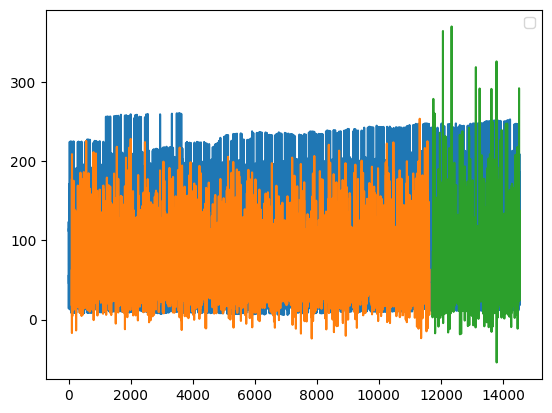

In [2]:
# Plot RMSE
trainScore = math.sqrt(mean_squared_error(y_train, train_predict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, test_predict))
print('Test Score: %.2f RMSE' % (testScore))

# Plot the data
look_back = 100
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()